In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aydafrough","key":"6f11d390d25b1f8e7987d65c72badb9a"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                Global Country Information Dataset 2023           23KB  2023-07-08 20:37:33           5910        208  1.0              
alphiree/cardiovascular-diseases-risk-prediction-dataset    Cardiovascular Diseases Risk Prediction Dataset    5MB  2023-07-03 12:12:19           6761        255  1.0              
arnavsmayan/netflix-userbase-dataset                        Netflix Userbase Dataset                          25KB  2023-07-04 07:38:41           7287        136  1.0              
joebeachcapital/top-10000-spotify-songs-1960-now            Top 10000 Songs on Spotify 1960-Now

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:45<00:00, 23.6MB/s]
100% 2.29G/2.29G [01:45<00:00, 23.5MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [61]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from pathlib import Path
from typing import List,Dict

In [28]:
train_path=Path('chest_xray/train')
test_path=Path('chest_xray/test')
val_path=Path('chest_xray/val')


In [9]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [32]:
import random
from PIL import Image

image_list=[]
image_list_path=list(test_path.glob("*/*.jpeg"))
for i in range(10):
  image_path=random.choice(image_list_path)
  image_class=image_path.parent.stem
  img=Image.open(image_path)

  image_list.append({'img':img, 'image_class':image_class})


image_list

[{'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1312x792>,
  'image_class': 'PNEUMONIA'},
 {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1968x1484>,
  'image_class': 'NORMAL'},
 {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1130x666>,
  'image_class': 'PNEUMONIA'},
 {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1796x1372>,
  'image_class': 'NORMAL'},
 {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1232x824>,
  'image_class': 'PNEUMONIA'},
 {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=744x416>,
  'image_class': 'PNEUMONIA'},
 {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1894x1597>,
  'image_class': 'NORMAL'},
 {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2345x1936>,
  'image_class': 'NORMAL'},
 {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1778x1168>,
  'image_class': 'NORMAL'},
 {'img': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2517x1979>,
 

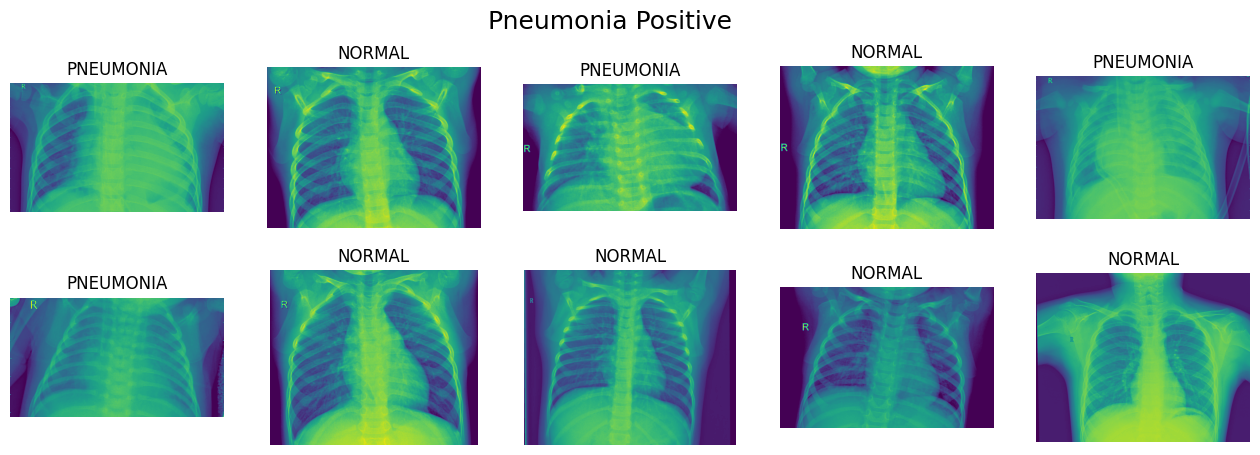

In [60]:
#visualize our data
fig = plt.figure(figsize=(16,5))
fig.suptitle("Pneumonia Positive", size=18)
for i, image in enumerate(image_list):
  #fig.add_subplot(2,5,len(image_list),frameon=False)
  plt.subplot(2,5,i+1,frameon=False)
  plt.imshow(image["img"])
  plt.title(image["image_class"])
  plt.axis(False)



fig.show()

In [62]:
#set transforms
normalize=transforms.Normalize(mean=[0.485,0.456,0.406],
                               std=[0.229,0.224,0.225])
data_transform= transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    normalize
])

In [64]:
#prepare datasets

train_data= datasets.ImageFolder(root=train_path,transform=data_transform,target_transform=None)
test_data=datasets.ImageFolder(root=test_path,transform=data_transform)
eval_data=datasets.ImageFolder(root=val_path,transform=data_transform)


In [65]:
#get the dataloaders
import os
batch_size=32
num_workers=os.cpu_count()
train_dataloader=DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True,num_workers=num_workers)
test_dataloader=DataLoader(dataset=test_data,batch_size=batch_size,shuffle=True,num_workers=num_workers)
eval_dataloader=DataLoader(dataset=eval_data,batch_size=batch_size,shuffle=True,num_workers=num_workers)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78e7f6996b00>,
 <torch.utils.data.dataloader.DataLoader at 0x78e7f69943d0>)